## Student performance indicator
### Life cycle of ML Project
- Understand the problem stmt
- Collect data
- Data checks to perform
- EDA
- Data preprocessing
- Model selection
- Model training




## Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


In [2]:
## import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
##Load the dataset
df = pd.read_csv('C:\\Datascience study\\Projects\\ML End to end\\Notebook\\data\\stud.csv')


In [6]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#print(df.head())
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
df.shape

(1000, 8)


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [ ]:
## Checking Missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [ ]:
## Duplicate values
df.duplicated().sum()

0


In [ ]:
## Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# checking the no: of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64


In [ ]:
## statistics of dataset
df.describe()

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [ ]:
## Exploring more on data
df.head()

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [ ]:
## Finding the unique values
print("GENDER::",df['gender'].unique())
print("RACE ETHNICITY-",df['race_ethnicity'].unique())
print("EDUCATION OF PARENTS-",df['parental_level_of_education'].unique())
print("LUNCH--",df['lunch'].unique())
print("TEST PREPARATION COURSE",df['test_preparation_course'].unique())


GENDER:: ['female' 'male']
RACE ETHNICITY- ['group B' 'group C' 'group A' 'group D' 'group E']
EDUCATION OF PARENTS- ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
LUNCH-- ['standard' 'free/reduced']
TEST PREPARATION COURSE ['none' 'completed']


In [ ]:
## DEFINING THE NUMBERICAL AND CATEGORICAL FEATURES
numericals=[feature for feature in df.columns if df[feature].dtype !='O']
categorical=[feature for feature in df.columns if df[feature].dtype =='O']

print(f'There are {len(numericals) } numerical features  {numericals}')
print(f'There are {len(categorical)} categorical features {categorical}')

There are 3 numerical features  ['math_score', 'reading_score', 'writing_score']
There are 5 categorical features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## adding the total score and avg columns 

In [4]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3


In [5]:
df.head(3)
        

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [ ]:
reading_centum=df[df['reading_score']==100]['average'].count()
writing_centum=df[df['writing_score']==100]['average'].count()
math_centum=df[df['math_score']==100]['average'].count()
print(f"NO of Reading centum {reading_centum}\n No of writing centum {writing_centum}\n No of math centum {math_centum}")


NO of Reading centum 17
 No of writing centum 14
 No of math centum 7


In [ ]:
reading_centum=df[df['reading_score']<=20]['average'].count()
writing_centum=df[df['writing_score']<=20]['average'].count()
math_centum=df[df['math_score']<=20]['average'].count()
print("No of students who took less than 20\n")
print(f"NO of Reading failed  {reading_centum}\n No of writing failed  {writing_centum}\n No of math failed {math_centum}")


No of students who took less than 20

NO of Reading failed  1
 No of writing failed  3
 No of math failed 4


## insights

- students performed worst in math 
- students performed very good in reading

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

In [7]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


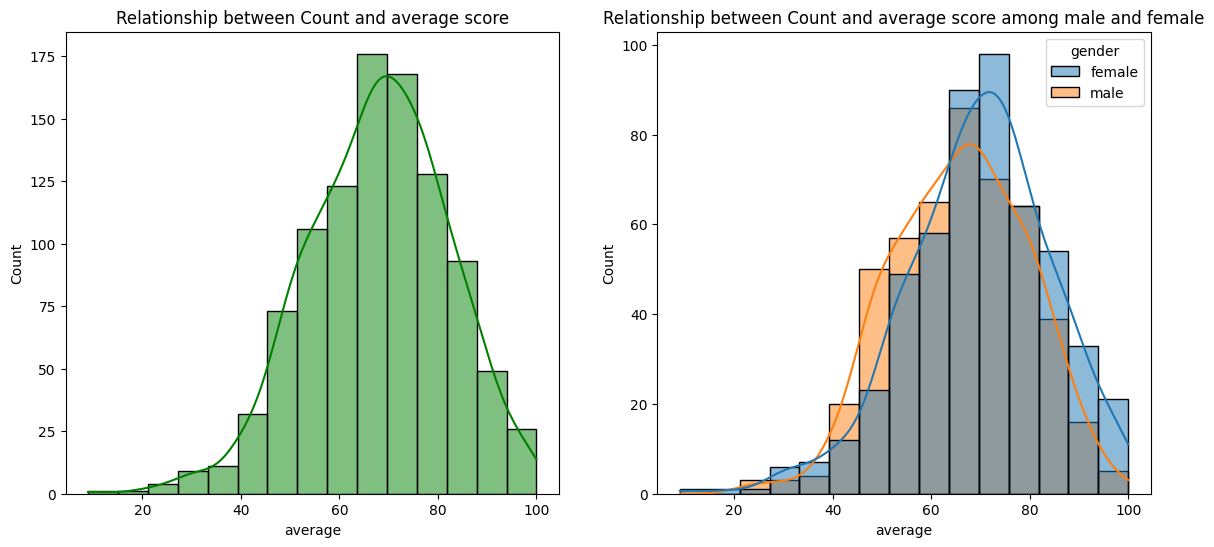

In [18]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=15,color='g',kde=True)  #kde= is the line or curve
axes[0].set_title('Relationship between Count and average score')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=15,hue='gender',color='b',kde=True)
axes[1].set_title('Relationship between Count and average score among male and female')
plt.show()


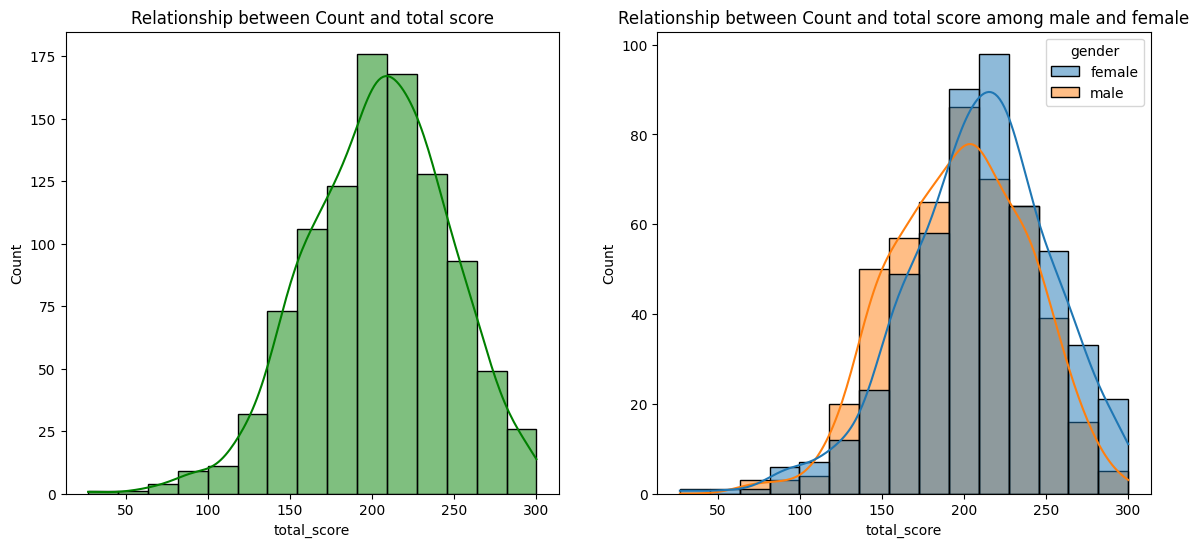

In [20]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=15,color='g',kde=True)  #kde= is the line or curve
axes[0].set_title('Relationship between Count and total score')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=15,hue='gender',color='b',kde=True)
axes[1].set_title('Relationship between Count and total score among male and female')
plt.show()


## Insights
- Female students scoring good marks than male

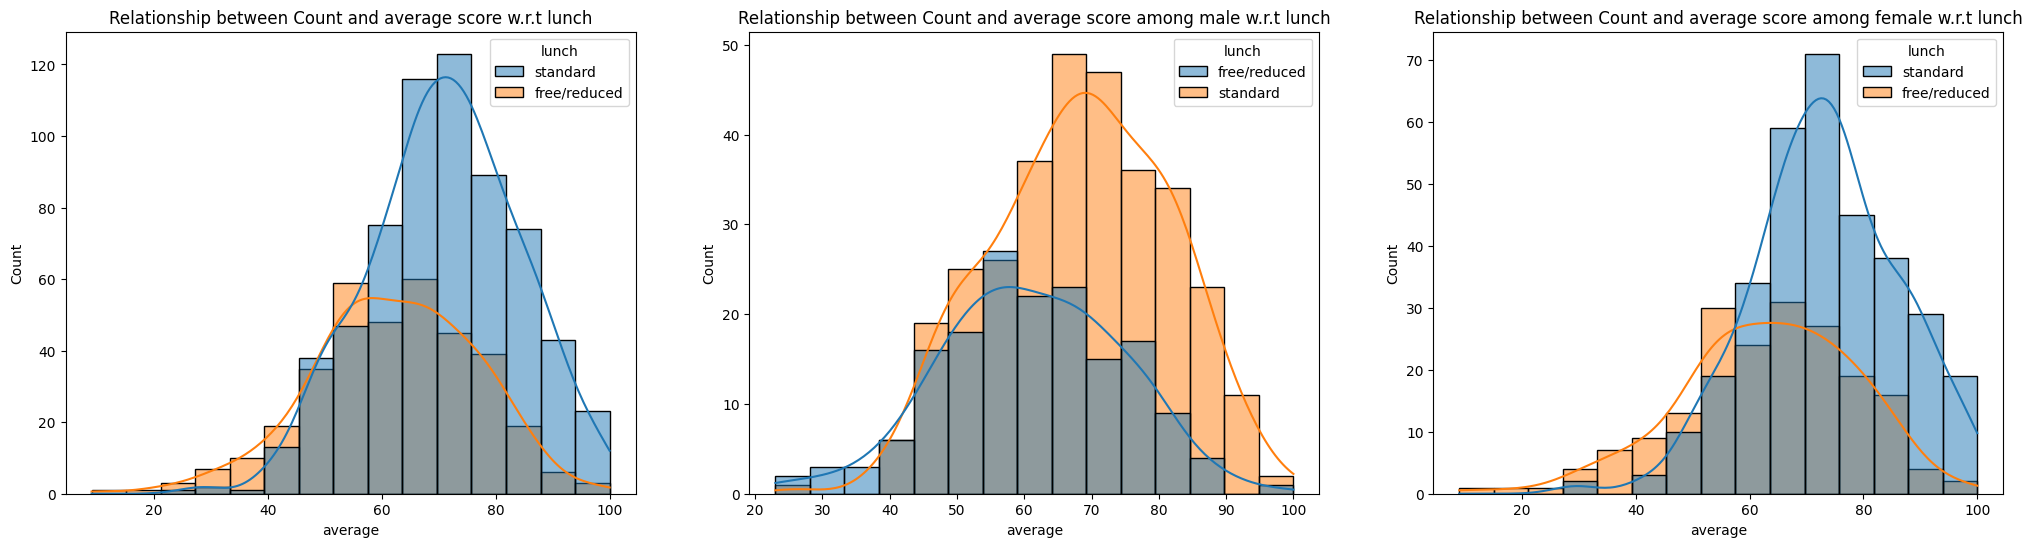

In [32]:
fig,axes=plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=15,color='g',kde=True,hue='lunch')  #kde= is the line or curve
axes[0].set_title('Relationship between Count and average score w.r.t lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',bins=15,hue='lunch',color='b',kde=True)
axes[1].set_title('Relationship between Count and average score among male w.r.t lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',bins=15,hue='lunch',color='b',kde=True)
axes[2].set_title('Relationship between Count and average score among female w.r.t lunch')
plt.show()


## insights
- students who are having standard lunch tends to perform well and having higher averages

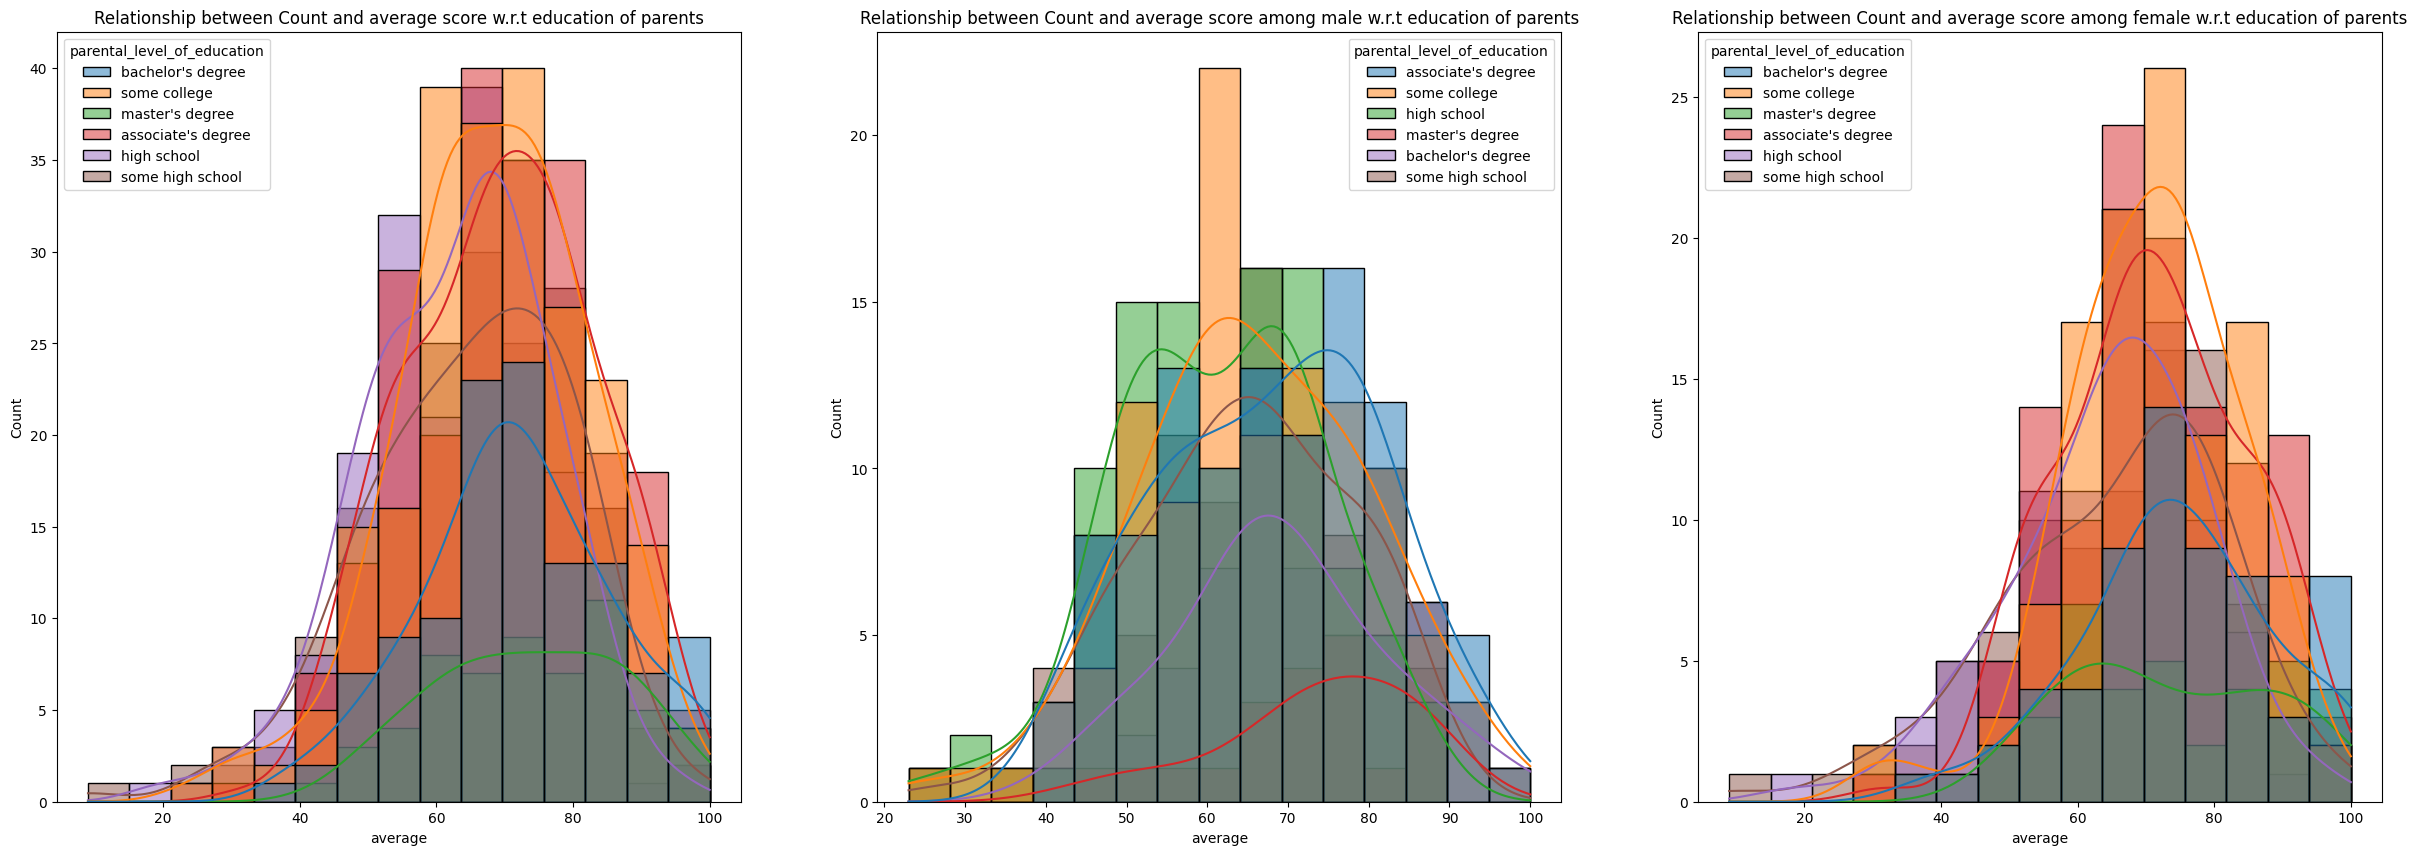

In [35]:
fig,axes=plt.subplots(1,3,figsize=(30,10))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=15,color='g',kde=True,hue='parental_level_of_education')  #kde= is the line or curve
axes[0].set_title('Relationship between Count and average score w.r.t education of parents')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',bins=15,hue='parental_level_of_education',color='b',kde=True)
axes[1].set_title('Relationship between Count and average score among male w.r.t education of parents')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',bins=15,hue='parental_level_of_education',color='b',kde=True)
axes[2].set_title('Relationship between Count and average score among female w.r.t education of parents')
plt.show()


## insights
- There is no significance r/s between score and parents educations 
- However students whose parents with some college degree tends to study well and having highest average scores
- irrespective of gender 

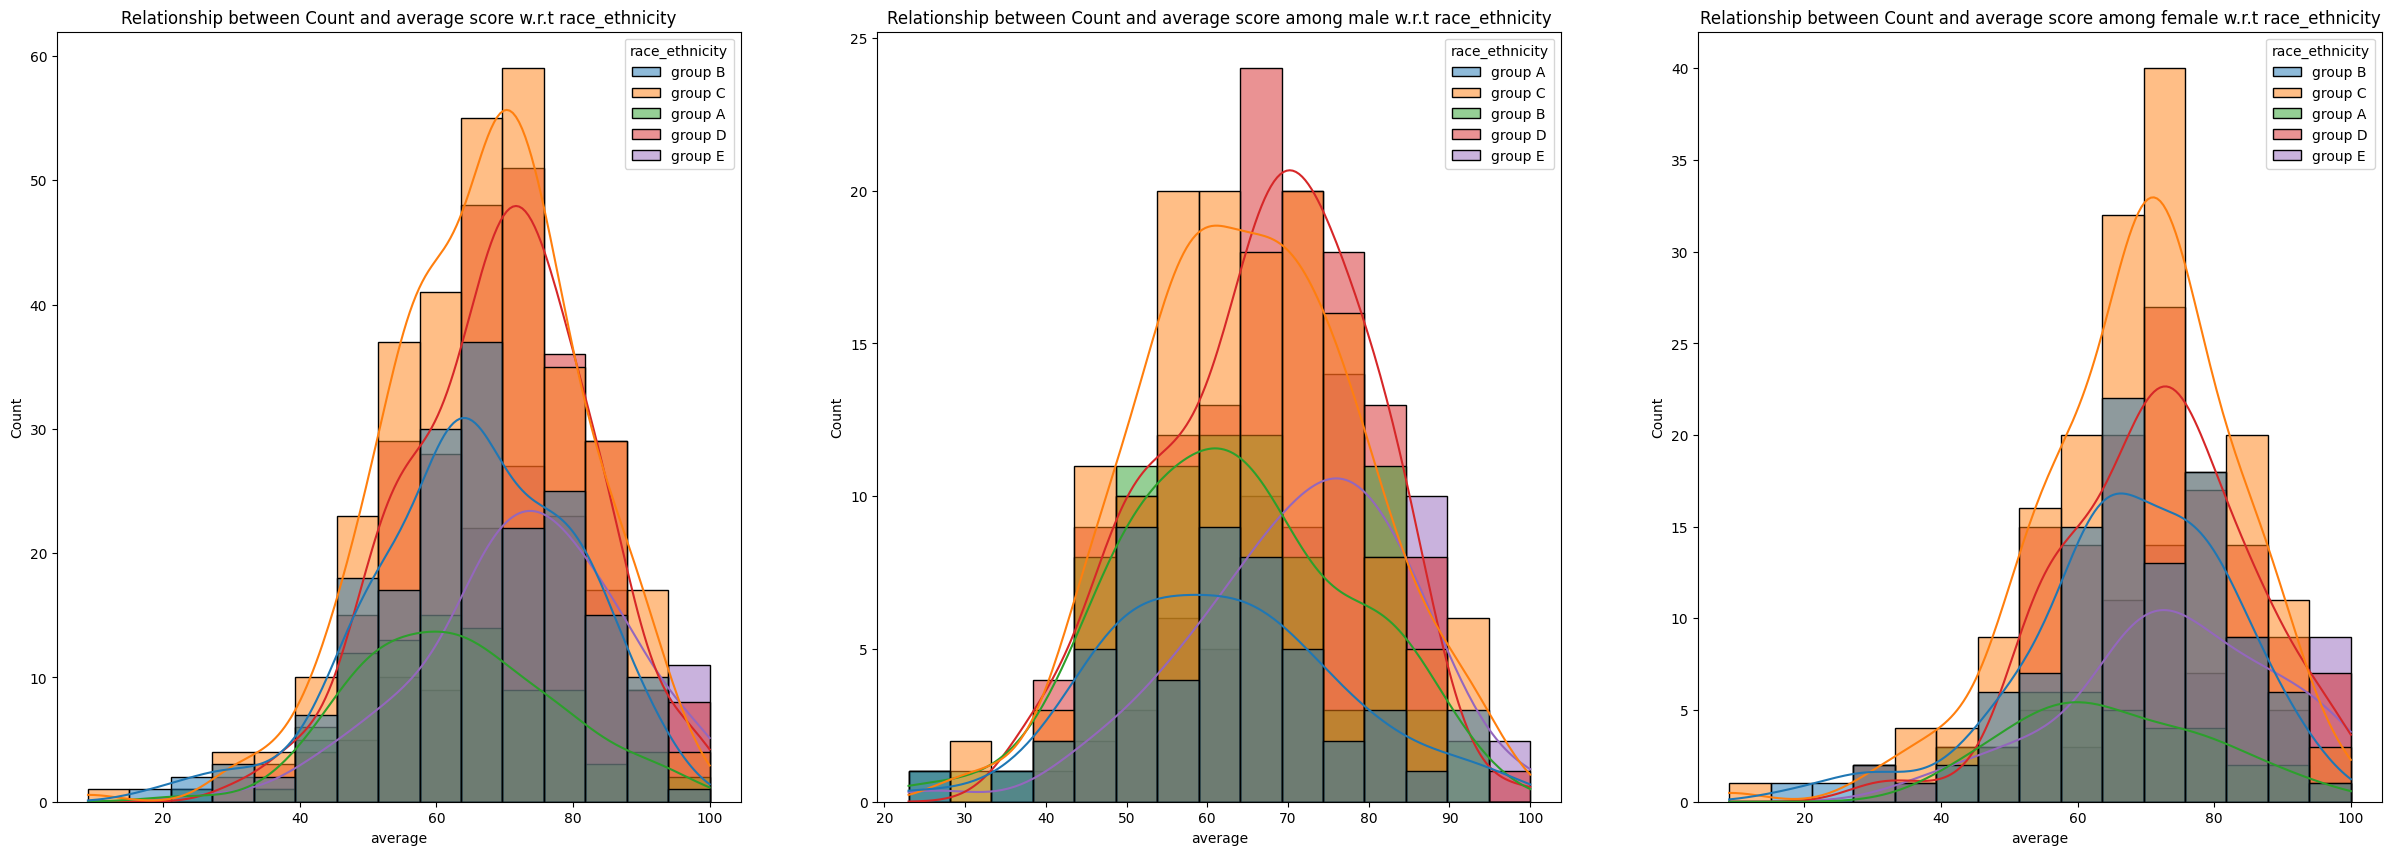

In [36]:
fig,axes=plt.subplots(1,3,figsize=(30,10))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=15,color='g',kde=True,hue='race_ethnicity')  #kde= is the line or curve
axes[0].set_title('Relationship between Count and average score w.r.t race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',bins=15,hue='race_ethnicity',color='b',kde=True)
axes[1].set_title('Relationship between Count and average score among male w.r.t race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',bins=15,hue='race_ethnicity',color='b',kde=True)
axes[2].set_title('Relationship between Count and average score among female w.r.t race_ethnicity')
plt.show()


## insights
- group c  and group d students irrespective of gender tends to study well 
- group a and b students studying poor 

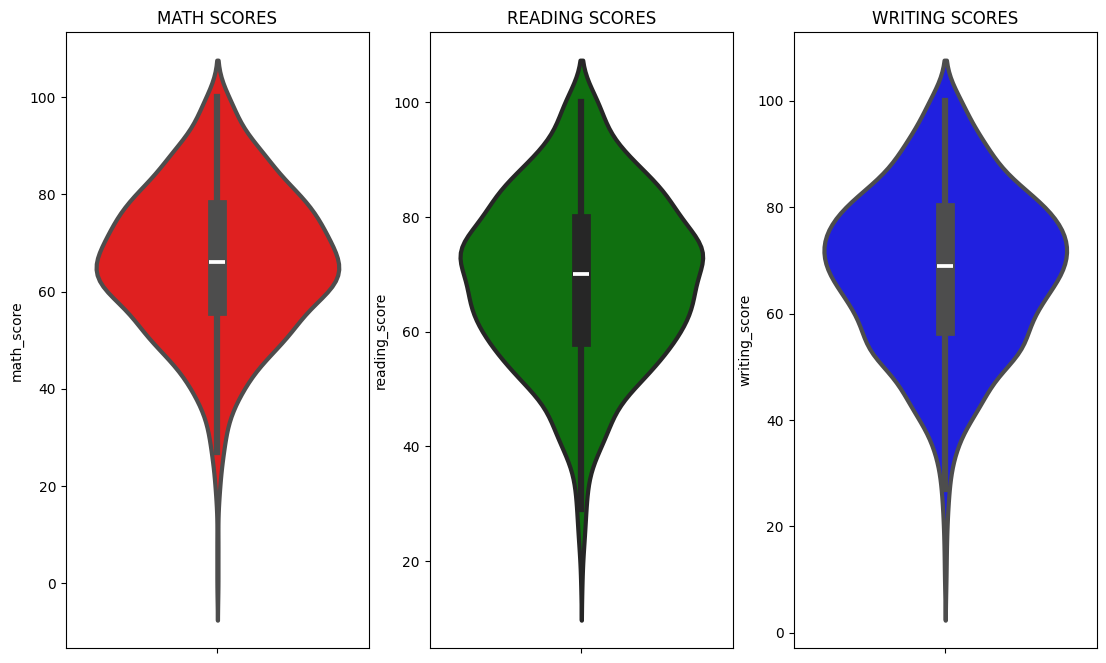

In [38]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

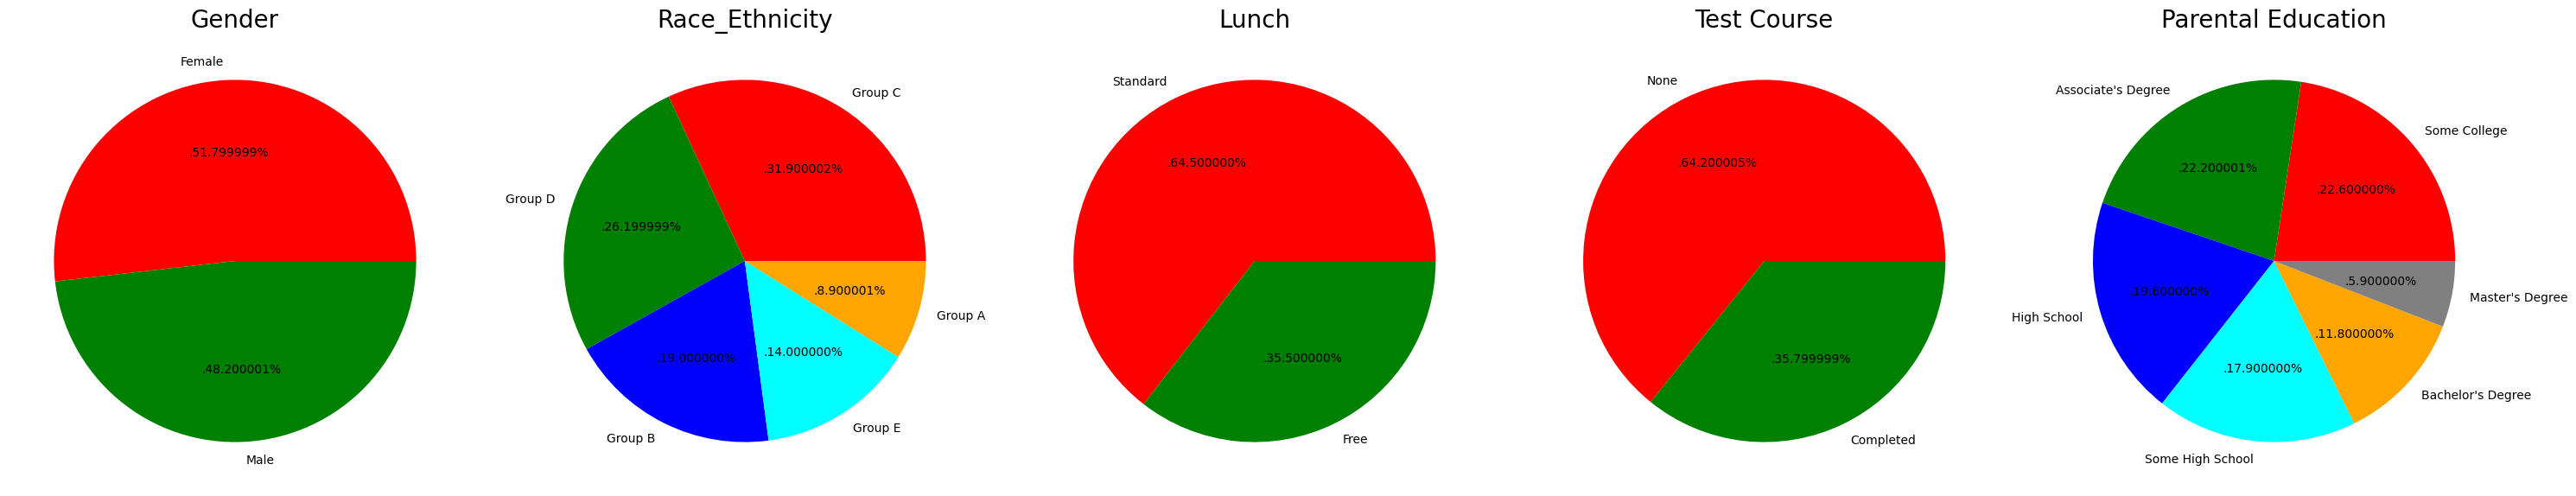

In [40]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

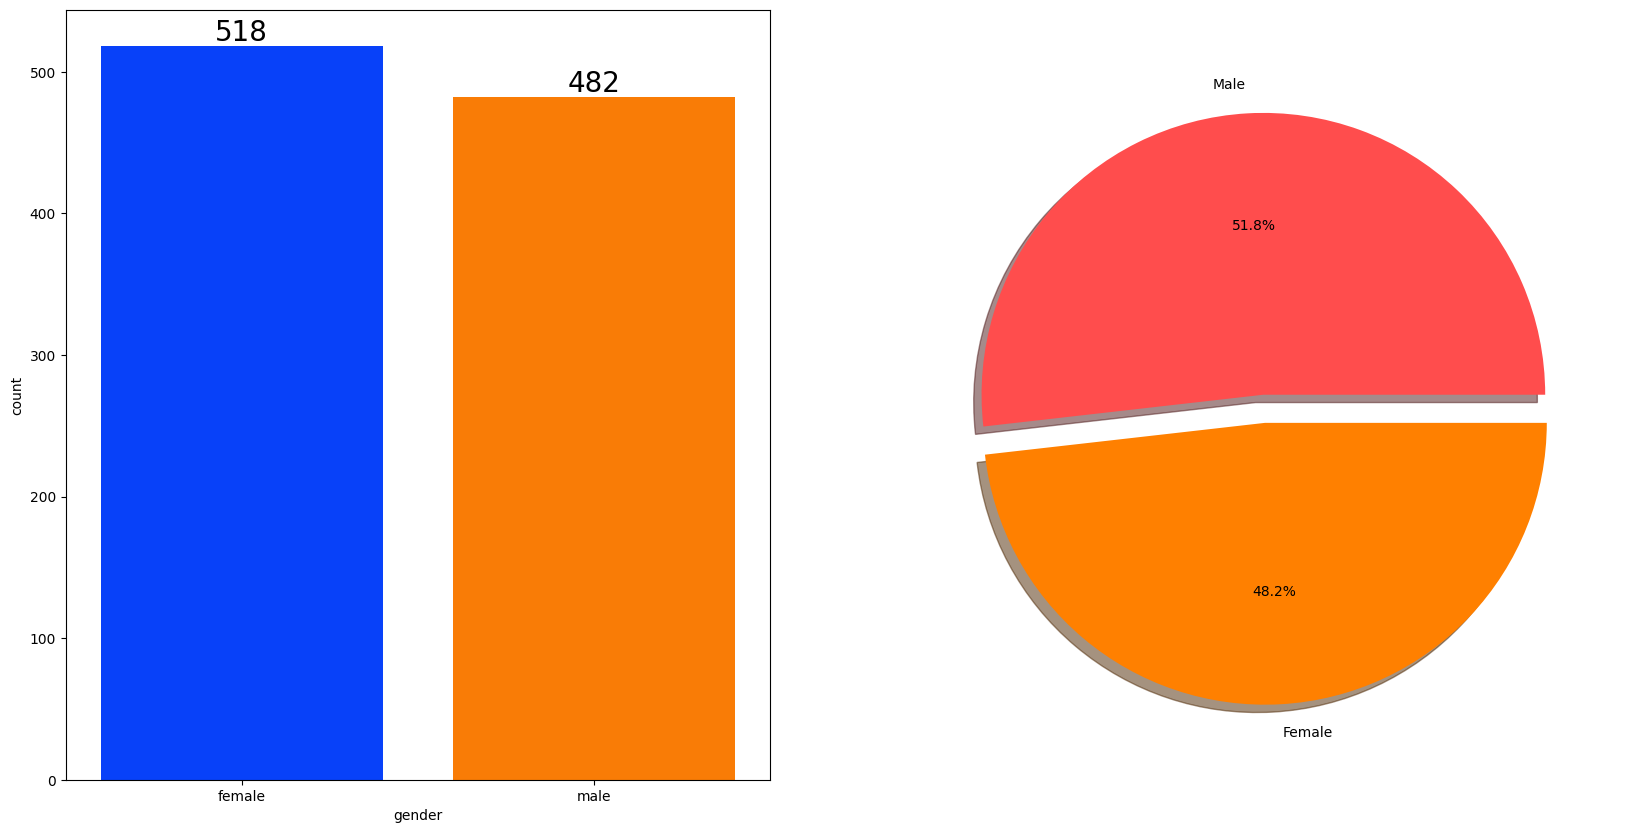

In [41]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [49]:
numeric_df = df.select_dtypes(include='number')
gender_group = df.groupby('gender')[numeric_df.columns].mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


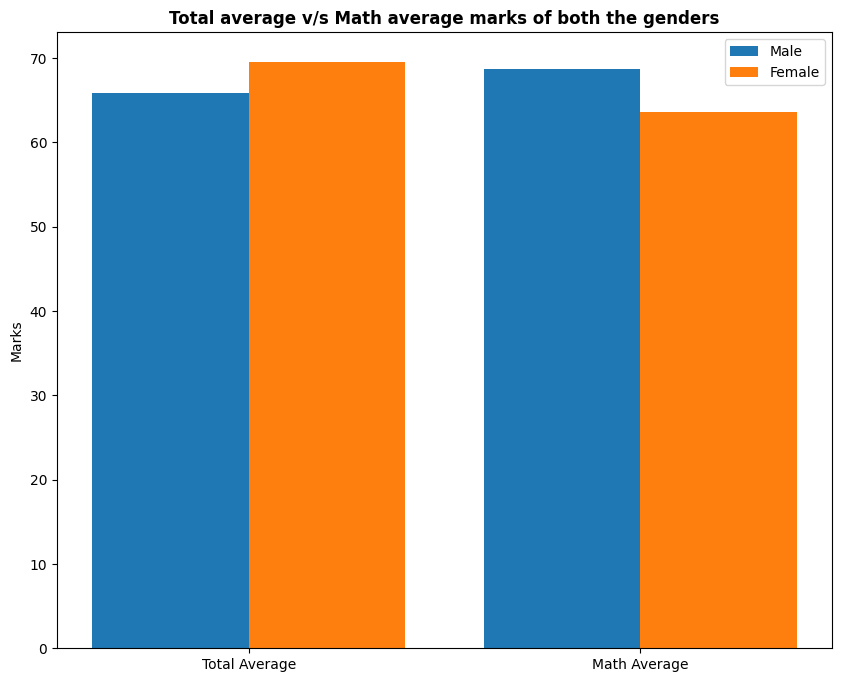

In [52]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.